In [161]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, recall_score

from imblearn.over_sampling import SMOTE
import optuna

In [162]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [164]:
test_id = test[['PassengerId']]

In [165]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [167]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [169]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [170]:
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

data['Surname'] = data['Name'].apply(lambda x: x.split(',')[0])
test['Surname'] = test['Name'].apply(lambda x: x.split(',')[0])

In [171]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [172]:
def drop_columns(df):
    
    df.drop(columns = ['PassengerId', 'Cabin', 'Ticket', 'Name'], axis =1, inplace = True)


drop_columns(data)
drop_columns(test)

In [173]:
def fill_values(df):
    df['Age'] = np.where(df['Age'] < 10, 10, df['Age'])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Age'] = df['Age'].astype('int64')
    df['Fare'] = df['Fare'].fillna(np.mean(df['Fare']))
    
fill_values(data)
fill_values(test)

In [174]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,30,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [175]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.492823,0.447368,0.392344,35.627188
std,0.841838,12.058459,0.896760,0.981429,55.840500
min,1.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [176]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [177]:
def outliers_fixing(df, feature):
    lower_limit = np.quantile(df[feature], .1)
    upper_limit = np.quantile(df[feature], .9)

    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])

    return df
    
data = outliers_fixing(data, 'Age')
data = outliers_fixing(data, 'Fare')
test = outliers_fixing(test, 'Age')
test = outliers_fixing(test, 'Fare')

In [178]:
def label_encode(df, features):
    le = LabelEncoder()
    for feature in features:
        df[feature] = le.fit_transform(df[feature])

In [179]:
features = ['Embarked', 'Sex']
label_encode(data, features)
label_encode(test, features)

In [180]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.5500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,30.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [181]:
def scale(df, features):
    for feature in features:
        scaler = MinMaxScaler()
        df[feature] = scaler.fit_transform(df[[feature]])

In [182]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Pclass']
scale(data, features)
scale(test, features)

In [183]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1,0.193548,0.125,0.000000,0.000000,1.0
1,1,0.0,0,0.709677,0.125,0.000000,0.905196,0.0
2,1,1.0,0,0.322581,0.000,0.000000,0.005326,1.0
3,1,0.0,0,0.612903,0.125,0.000000,0.646941,1.0
4,0,1.0,1,0.612903,0.000,0.000000,0.007101,1.0
...,...,...,...,...,...,...,...,...
886,0,0.5,1,0.354839,0.000,0.000000,0.077406,1.0
887,1,0.0,0,0.096774,0.000,0.000000,0.318854,1.0
888,0,1.0,0,0.451613,0.125,0.333333,0.225826,1.0
889,1,0.0,1,0.322581,0.000,0.000000,0.318854,0.0


<Axes: >

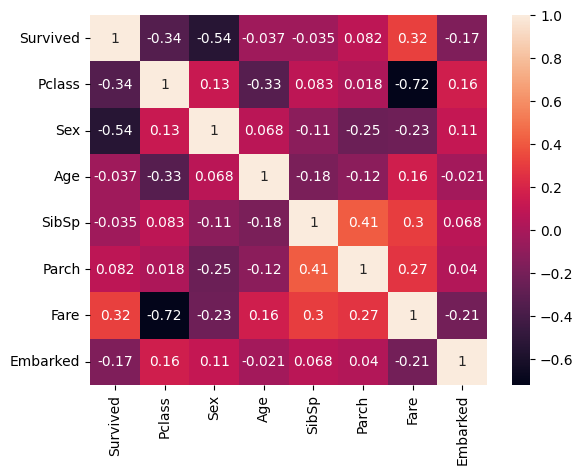

In [184]:
sn.heatmap(data.corr(), annot = True)

In [185]:
X = data.drop(['Survived', 'Pclass'], axis =1)
test = test.drop(['SibSp'], axis = 1)
y = data['Survived']

<Axes: >

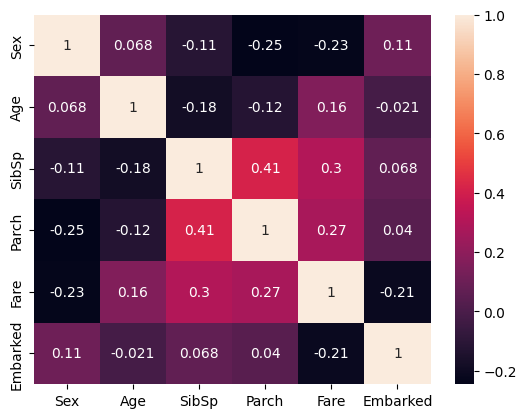

In [186]:
sn.heatmap(X.corr(), annot = True)

# label balancing

In [187]:
smote = SMOTE(random_state=54)
X_resample, y_resample = smote.fit_resample(X, y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

In [203]:
def objective(trial):
    # hyper parameters 
    C = trial.suggest_int('C', 0.001, 1000)
    penalty = trial.suggest_categorical('penalty', ['l2'])
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    
    model = LogisticRegression(penalty = penalty, solver = solver, C = C)

    model.fit(X_train, y_train)
    
    result = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, result)
    
    return accuracy

In [204]:
study = optuna.create_study(direction= 'maximize')

[I 2023-09-13 15:56:25,768] A new study created in memory with name: no-name-0e2b795e-ecb4-4677-80f5-9be73b040fb2


In [205]:
study.optimize(objective, n_trials=100, n_jobs= -1)

[I 2023-09-13 15:56:26,256] Trial 0 finished with value: 0.8268156424581006 and parameters: {'C': 584, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:26,462] Trial 2 finished with value: 0.8268156424581006 and parameters: {'C': 429, 'penalty': 'l2', 'solver': 'sag'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:26,464] Trial 1 finished with value: 0.8268156424581006 and parameters: {'C': 350, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:26,541] Trial 3 finished with value: 0.8268156424581006 and parameters: {'C': 263, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:26,565] Trial 4 finished with value: 0.8268156424581006 and parameters: {'C': 122, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:26,603] Trial 5 finished w

[I 2023-09-13 15:56:29,408] Trial 45 finished with value: 0.8268156424581006 and parameters: {'C': 81, 'penalty': 'l2', 'solver': 'sag'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:29,443] Trial 44 finished with value: 0.8268156424581006 and parameters: {'C': 112, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:29,513] Trial 46 finished with value: 0.8268156424581006 and parameters: {'C': 649, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:29,571] Trial 47 finished with value: 0.8268156424581006 and parameters: {'C': 247, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:29,658] Trial 48 finished with value: 0.8268156424581006 and parameters: {'C': 275, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:29,727] Trial 49 finis

[I 2023-09-13 15:56:33,528] Trial 88 finished with value: 0.8268156424581006 and parameters: {'C': 663, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:33,542] Trial 89 finished with value: 0.8268156424581006 and parameters: {'C': 674, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:33,770] Trial 90 finished with value: 0.8268156424581006 and parameters: {'C': 729, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:33,794] Trial 91 finished with value: 0.8268156424581006 and parameters: {'C': 795, 'penalty': 'l2', 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:33,937] Trial 92 finished with value: 0.8268156424581006 and parameters: {'C': 835, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.8268156424581006.
[I 2023-09-13 15:56:33,972] Trial 93 fin

In [33]:
pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
submission_pred = pd.concat([test_id, test_pred_df], axis =1)
submission_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


submission_pred.to_csv('Sub_file.csv', index =False )